In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ls  data/

crime_astros_final.csv*  crime_ru_final.csv*      crime_uh_final.csv*
crime_dynamo_final.csv*  crime_texans_final.csv*


In [4]:
path ='data/crime_uh_final.csv'

In [5]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
#df = df.set_index('date').sort_index(ascending=True)
df['game_on'] = np.where(df.game =='No Game',0,1)
df.drop(['game'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16826 entries, 0 to 16825
Data columns (total 15 columns):
date            16826 non-null datetime64[ns]
Beat            16826 non-null object
OffenseType     16826 non-null object
Premise         16826 non-null object
NumOffenses     16826 non-null float64
hour            16826 non-null int64
day             16826 non-null int64
weekday         16826 non-null object
month           16826 non-null object
year            16826 non-null int64
lat             16826 non-null float64
lon             16826 non-null float64
add             16826 non-null object
dist_stadium    16826 non-null float64
game_on         16826 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 1.9+ MB


In [6]:
df.head(2)

,date,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game_on
0,2010-01-01,10H60,Burglary,apartment,1.0,0,1,Friday,Jan,2010,29.719598,-95.373216,"2550 Southmore Blvd, Houston, TX 77004, USA",1.454853,0
1,2010-01-01,10H60,Theft,apartment,1.0,0,1,Friday,Jan,2010,29.709357,-95.362421,"3550 S MacGregor Way, Houston, TX 77021, USA",1.177570,0


## Trim df

In [7]:
print(list(df.columns))

['date', 'Beat', 'OffenseType', 'Premise', 'NumOffenses', 'hour', 'day', 'weekday', 'month', 'year', 'lat', 'lon', 'add', 'dist_stadium', 'game_on']


In [8]:
#df= df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]
df = df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]

In [9]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Burglary,0,Friday,1.454853,0
1,Theft,0,Friday,1.177570,0
2,Robbery,4,Friday,0.359544,0
3,Theft,6,Friday,2.926478,0
4,Theft,14,Friday,1.633341,0


In [10]:
df.describe()

,hour,dist_stadium,game_on
count,16826.000000,16826.000000,16826.000000
mean,12.593367,2.275644,0.025793
std,6.830105,17.775830,0.158523
min,0.000000,0.059856,0.000000
25%,8.000000,0.770445,0.000000
50%,13.000000,1.170098,0.000000
75%,18.000000,1.493118,0.000000
max,23.000000,887.869793,1.000000


## TEST1

In [11]:
one_mile =  df.dist_stadium <= 3.0
df = df[one_mile]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


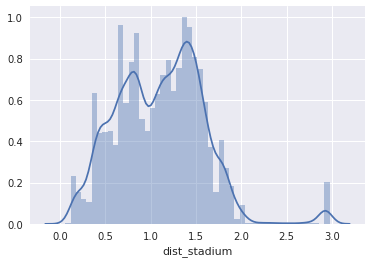

In [12]:

# find distribution of target column / trying to predict
sns.distplot(df['dist_stadium'])

In [13]:
df.corr()

,hour,dist_stadium,game_on
hour,1.000000,-0.052721,-0.007663
dist_stadium,-0.052721,1.000000,-0.031867
game_on,-0.007663,-0.031867,1.000000


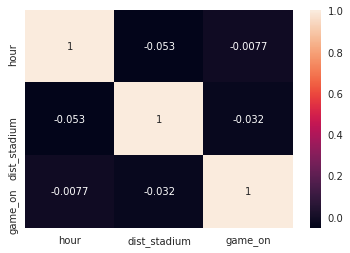

In [14]:

sns.heatmap(df.corr(),annot=True)

## Get dummies

In [ ]:
pd.get_dummies?

In [15]:
dfdm = pd.get_dummies(df, drop_first=True)

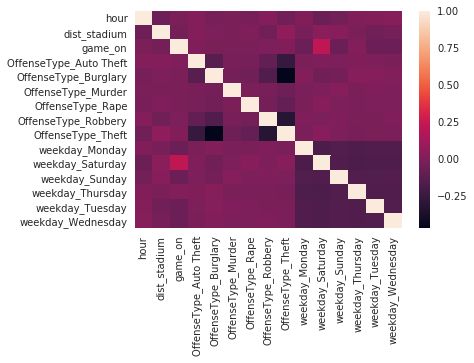

In [16]:
sns.heatmap(dfdm.corr(),annot=False)

In [18]:
dfdm.head()

,hour,dist_stadium,game_on,OffenseType_Auto Theft,OffenseType_Burglary,OffenseType_Murder,OffenseType_Rape,OffenseType_Robbery,OffenseType_Theft,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1.454853,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.177570,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,0.359544,0,0,0,0,0,1,0,0,0,0,0,0,0
3,6,2.926478,0,0,0,0,0,0,1,0,0,0,0,0,0
4,14,1.633341,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Burglary,0,Friday,1.454853,0
1,Theft,0,Friday,1.177570,0
2,Robbery,4,Friday,0.359544,0
3,Theft,6,Friday,2.926478,0
4,Theft,14,Friday,1.633341,0


## Pairplot

In [20]:
#sns.pairplot(dfdm)

In [21]:
#dfdm.drop(['dist_stadium'],axis=1)
#dfdm['game_on']

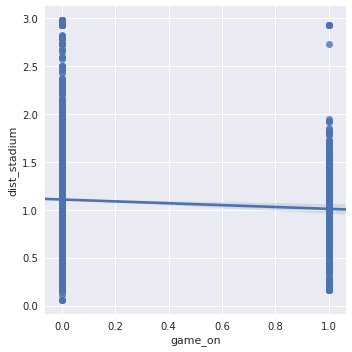

In [22]:
sns.lmplot(x='game_on',y='dist_stadium', data=dfdm)

In [23]:
from sklearn.cross_validation import train_test_split

X = dfdm.drop(['hour'],axis=1)

y = dfdm['hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3,
                                random_state=42)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# train model

In [24]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
model =  LinearRegression()


# train fit model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evalueate model

In [25]:
print(model.intercept_)
print(model.coef_)

14.85315221707184
[-0.47902399 -0.10058445 -0.38869407 -1.54508703 -1.7889932  -2.05681132
 -0.39802906 -1.3680647  -0.45067421 -1.82775306 -1.24136877 -0.54761647
 -0.27511001 -0.27401251]


## Create a dataframe from coeff

In [26]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
dist_stadium,-0.479024
game_on,-0.100584
OffenseType_Auto Theft,-0.388694
OffenseType_Burglary,-1.545087
OffenseType_Murder,-1.788993
OffenseType_Rape,-2.056811
OffenseType_Robbery,-0.398029
OffenseType_Theft,-1.368065
weekday_Monday,-0.450674
weekday_Saturday,-1.827753


## Predictions from our test

In [27]:
predictions = model.predict(X_test)

## Pefrorm scatteplot                                

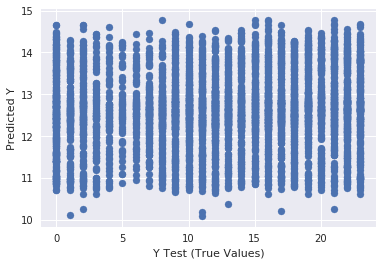

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


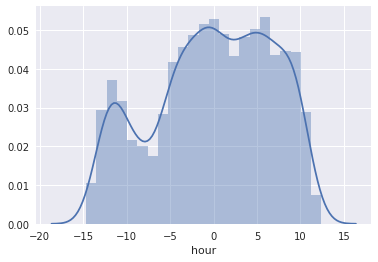

In [29]:
# histogram of the residuals
sns.distplot((y_test - predictions),bins='auto')

## Calculate metrics

In [30]:
from sklearn import metrics

## MAE
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
- mean of the absolute error
- take your error and take the absolute value of it and average it out.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 5.717972657260969


In [32]:
def L1(yHat, y):
    return np.sum(np.absolute(yHat - y))

L1(y_test,predictions)

27166.088094646864

# MSE

**Mean Squared Error** (MSE) is the mean of the squared errors:

- mean of the squared errors
- popular b/c it punish larger errors
- more usefull in the real world  because it takes into account larger b/c its square them.


$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [33]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 46.72305691803397


In [34]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size

MSE(y_test,predictions)

46.72305691803397

# RMSE
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [35]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 6.835426608342304


## RSQ


In [36]:
print('RSQ:', metrics.explained_variance_score(y_test, predictions))

RSQ: 0.008495846060483592


In [37]:
params = pd.Series(model.coef_, index=X.columns)
params

dist_stadium             -0.479024
game_on                  -0.100584
OffenseType_Auto Theft   -0.388694
OffenseType_Burglary     -1.545087
OffenseType_Murder       -1.788993
OffenseType_Rape         -2.056811
OffenseType_Robbery      -0.398029
OffenseType_Theft        -1.368065
weekday_Monday           -0.450674
weekday_Saturday         -1.827753
weekday_Sunday           -1.241369
weekday_Thursday         -0.547616
weekday_Tuesday          -0.275110
weekday_Wednesday        -0.274013
dtype: float64

In [38]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [39]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                        effect  error
dist_stadium              -0.0    0.0
game_on                   -0.0    0.0
OffenseType_Auto Theft    -0.0    0.0
OffenseType_Burglary      -2.0    0.0
OffenseType_Murder        -2.0    1.0
OffenseType_Rape          -2.0    1.0
OffenseType_Robbery       -0.0    0.0
OffenseType_Theft         -1.0    0.0
weekday_Monday            -0.0    0.0
weekday_Saturday          -2.0    0.0
weekday_Sunday            -1.0    0.0
weekday_Thursday          -1.0    0.0
weekday_Tuesday           -0.0    0.0
weekday_Wednesday         -0.0    0.0
